In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [7]:
train = pd.read_csv('train_data.csv').set_index('PassengerId')
test = pd.read_csv('test_data.csv').set_index('PassengerId')

In [8]:
train['Is alone']= 0
train.loc[(train['SibSp'] == 0) & (train['Parch'] == 0), 'Is alone'] = 1
train = train.drop(['Ticket', 'Name', 'Cabin', 'SibSp', 'Parch'], axis=1)
train.loc[:, 'Sex'] = train['Sex'].apply(lambda x: 0 if x == 'female' else 1)
train = pd.get_dummies(train)
train.loc[:, 'Fare'] = preprocessing.scale(train['Fare'])
train.head()

In [10]:
test['Is alone']= 0
test.loc[(test['SibSp'] == 0) & (test['Parch'] == 0), 'Is alone'] = 1
test = test.drop(['Ticket', 'Name', 'Cabin', 'SibSp', 'Parch'], axis=1)
test.loc[:, 'Sex'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
test = pd.get_dummies(test)
test.loc[:, 'Fare'] = preprocessing.scale(test['Fare'])
test.head()

,Pclass,Sex,Age,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,1,34.5,7.8292,1,0,1,0
893,3,0,47.0,7.0000,0,0,0,1
894,2,1,62.0,9.6875,1,0,1,0
895,3,1,27.0,8.6625,1,0,0,1
896,3,0,22.0,12.2875,0,0,0,1


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           332 non-null float64
Fare          417 non-null float64
Is alone      418 non-null int64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [12]:
mean_age = test.Age.mean()
std_age = test.Age.std()
test.loc[:, 'Age'] = test['Age'].fillna(np.random.uniform(mean_age - std_age, mean_age + std_age))
test = test.fillna(test.median())

In [13]:
mean_age = train.Age.mean()
std_age = train.Age.std()
train.loc[:, 'Age'] = train['Age'].fillna(np.random.uniform(mean_age - std_age, mean_age + std_age))

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Is alone      891 non-null int64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


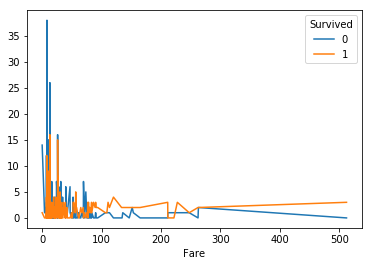

In [45]:
pd.crosstab(train['Fare'], train['Survived']).plot()
# preprocessing.scale(X_train)

In [51]:
# pd.crosstab(np.log(train[train['Fare'] != 0]), train.loc[train['Fare'] != 0, 'Survived']).plot()

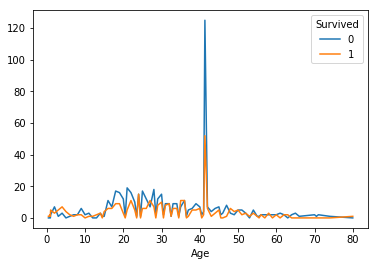

In [67]:
pd.crosstab(train['Age'], train['Survived']).plot()

In [18]:
train.describe()

,Survived,Pclass,Sex,Age,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,32.010423,32.204208,0.602694,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.806746,49.693429,0.489615,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,32.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,41.333996,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [ ]:
# train[train['Fare'] == 0]

In [ ]:
# train.loc[train['Fare'] != 0, 'Fare'] = np.log(train[train['Fare'] != 0]['Fare'])

In [ ]:
# train.loc[train['Age'] <= 16, 'Sex'] = 2
# train.loc[train['Age'] >= 45, 'Sex'] = 3

In [19]:
train = train.join(pd.get_dummies(train['Pclass'])).drop('Pclass', axis=1)
test = test.join(pd.get_dummies(test['Pclass'])).drop('Pclass', axis=1)

In [20]:
train_label = train['Survived']
train_features = train.drop('Survived', axis=1)

In [21]:
train_features.head()

,Sex,Age,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S,1,2,3
PassengerId,,,,,,,,,,
1,1,22.0,7.2500,0,0,0,1,0,0,1
2,0,38.0,71.2833,0,1,0,0,1,0,0
3,0,26.0,7.9250,1,0,0,1,0,0,1
4,0,35.0,53.1000,0,0,0,1,1,0,0
5,1,35.0,8.0500,1,0,0,1,0,0,1


In [22]:
depth = [x for x in range(1, 20)]

In [34]:
forest_classifier = RandomForestClassifier(random_state=0)

In [35]:
clf = GridSearchCV(estimator=forest_classifier, param_grid=dict(max_depth=depth),n_jobs=-1)

In [25]:
# cv_results = cross_validate(forest_classifier, train_features, train_label, return_train_score=False)

In [ ]:
# cv_results['test_score']

In [36]:
clf.fit(train_features, train_label)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
clf.best_score_  

0.8103254769921436

In [38]:
clf.best_estimator_.max_depth

8

In [39]:
clf.score(train_features, train_label)

0.9068462401795735

In [57]:
forest_classifier = RandomForestClassifier(random_state=0, max_depth=4)

In [58]:
forest_classifier.fit(train_features, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
forest_classifier.score(train_features, train_label)

0.8215488215488216

In [60]:
forest_classifier.feature_importances_

array([0.36879449, 0.13346768, 0.15249157, 0.00907108, 0.00962585,
       0.00091774, 0.04707089, 0.08655297, 0.0121389 , 0.17986884])

In [61]:
test.head()

,Sex,Age,Fare,Is alone,Embarked_C,Embarked_Q,Embarked_S,1,2,3
PassengerId,,,,,,,,,,
892,1,34.5,7.8292,1,0,1,0,0,0,1
893,0,47.0,7.0000,0,0,0,1,0,0,1
894,1,62.0,9.6875,1,0,1,0,0,1,0
895,1,27.0,8.6625,1,0,0,1,0,0,1
896,0,22.0,12.2875,0,0,0,1,0,0,1


In [62]:
predicted = forest_classifier.predict(test)

In [63]:
answer = pd.DataFrame({  'PassengerId' : test.index,
                         'Survived' : predicted})

In [64]:
answer.to_csv('answer.csv', index=False)